In [1]:
import h5py
import scipy.interpolate as sc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Open the data file obtained from Terra/Aqua satellite
file = h5py.File('MOD14.A2021087.1335.006.NRT.h5.hdf', 'r')

In [3]:
# Check what keys are presend int he data
list(file.keys())

['FP_AdjCloud',
 'FP_AdjWater',
 'FP_MAD_DT',
 'FP_MAD_R2',
 'FP_MAD_T21',
 'FP_MAD_T31',
 'FP_MeanDT',
 'FP_MeanR2',
 'FP_MeanT21',
 'FP_MeanT31',
 'FP_NumValid',
 'FP_R2',
 'FP_RelAzAng',
 'FP_SolZenAng',
 'FP_T21',
 'FP_T31',
 'FP_ViewZenAng',
 'FP_WinSize',
 'FP_confidence',
 'FP_land',
 'FP_latitude',
 'FP_line',
 'FP_longitude',
 'FP_power',
 'FP_sample',
 'algorithm QA',
 'fire mask',
 'latitude',
 'longitude',
 'number_of_active_fires',
 'number_of_scan_lines',
 'pixels_per_scan_line']

In [4]:
# DO some sanity checks
data = np.array(file['fire mask'])
lat = np.array(file['latitude'])
lon = np.array(file['longitude'])
print('Shapes of the arrays - lat:{}, lon:{}, data:{}'.format(lat.shape, lon.shape, data.shape))

Shapes of the arrays - lat:(2030, 1354), lon:(2030, 1354), data:(2030, 1354)


In [5]:
# Check out the range of the data
print('lat min, max, lon min max: {}, {}, {}, {}'.format(lat.min(), lat.max(), lon.min(), lon.max()))

lat min, max, lon min max: -28.008459091186523, -6.974177837371826, -63.37385940551758, -37.23870849609375


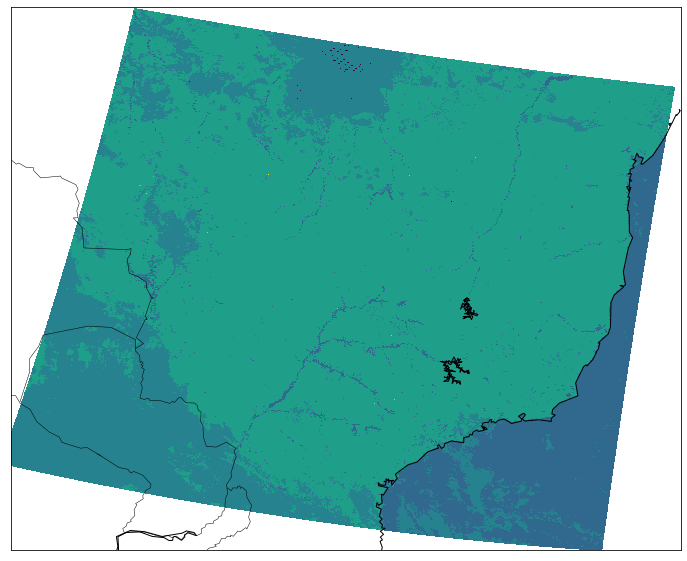

In [11]:
# Plot the data on the world map, to verify that the numbers look right
plt.figure(figsize=(30, 10))
worldmap = Basemap(llcrnrlon=-63,llcrnrlat=-28,urcrnrlon=-37,urcrnrlat=-6.9, resolution = 'l')
worldmap.drawcountries()
worldmap.drawcoastlines()
worldmap.pcolormesh(lon, lat, data)
plt.show()

In [19]:
"""

From the documentation of the data

Following are the meanings of the numbers in data array

0: missing input data
1: not processed (obsolete)
2: not processed(obsolete)
3: non-fire water
4: cloud
5: non-fire land
6: unknown
7: fire (low confidence)
8: fire (nominal confidence)
9: fir (hight confidence)

"""

'\n\nFrom the documentation of the data\n\nFollowing are the meanings of the numbers in data array\n\n0: missing input data\n1: not processed (obsolete)\n2: not processed(obsolete)\n3: non-fire water\n4: cloud\n5: non-fire land\n6: unknown\n7: fire (low confidence)\n8: fire (nominal confidence)\n9: fir (hight confidence)\n\n'

In [22]:
"""

Lets do some sanity checks.

First, the sum of all the data values with values from 0 to nine should be the same as the dimensions of the data array.

Data array dimensions are 2030 * 1354

So, is we sum up the instances in data array with values 0 through 9, they ust add up to 2030 * 1354

"""

total = 0
for i in range(0,9):
    total += (data == i).sum()
print(total)

2748605


In [29]:
"""

That establised, the total number of fires detected is the count of entries in data array 
with values matching those for fire

Values 7, 8 and 9 correspond to fire with increasing confidence.

We may or may not want to include the lower confidence values.

"""

fire_values = [7, 8, 9]
total_number_of_fires = 0
for value in fire_values:
    total_number_of_fires += (data == value).sum()
    
print('Total number of fires int he given grid: {}'.format(total_number_of_fires))


Total number of fires int he given grid: 114
